In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import gc
sns.set(rc = {"figure.figsize":(12, 5)})
plt.figure(figsize = (12, 5))

dtypes = {"ip": "uint32",
         "app": "uint16",
         "device": "uint16",
         "os": "uint16",
         "channel": "uint16",
         "is_attributed": "uint8",
         "click_id": "uint32"}

train = pd.read_csv("../input/train.csv", low_memory = True, skiprows = range(1, 9308569), 
#                     nrows = 6901686, 
                    dtype = dtypes,
                    usecols = ["ip", "app", "device", "os", "channel", "click_time", "is_attributed"])
test = pd.read_csv("../input/test.csv", low_memory = True, dtype = dtypes,
                    usecols = ["ip", "app", "device", "os", "channel", "click_time"])

In [2]:
train["day"] = pd.to_datetime(train["click_time"]).dt.day.astype("uint8")
train["hour"] = pd.to_datetime(train["click_time"]).dt.hour.astype("uint8")
test["day"] = pd.to_datetime(test["click_time"]).dt.day.astype("uint8")
test["hour"] = pd.to_datetime(test["click_time"]).dt.hour.astype("uint8")

In [3]:
train.head()

,ip,app,device,os,channel,click_time,is_attributed,day,hour
0,70712,2,1,32,237,2017-11-07 00:00:00,0,7,0
1,45892,3,1,25,424,2017-11-07 00:00:00,0,7,0
2,37774,8,2,13,145,2017-11-07 00:00:00,0,7,0
3,41179,2,1,13,122,2017-11-07 00:00:00,0,7,0
4,83111,15,1,8,245,2017-11-07 00:00:00,0,7,0


In [4]:
train.tail()

,ip,app,device,os,channel,click_time,is_attributed,day,hour
175595317,121312,12,1,10,340,2017-11-09 16:00:00,0,9,16
175595318,46894,3,1,19,211,2017-11-09 16:00:00,0,9,16
175595319,320126,1,1,13,274,2017-11-09 16:00:00,0,9,16
175595320,189286,12,1,37,259,2017-11-09 16:00:00,0,9,16
175595321,106485,11,1,19,137,2017-11-09 16:00:00,0,9,16


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175595322 entries, 0 to 175595321
Data columns (total 9 columns):
ip               uint32
app              uint16
device           uint16
os               uint16
channel          uint16
click_time       object
is_attributed    uint8
day              uint8
hour             uint8
dtypes: object(1), uint16(4), uint32(1), uint8(3)
memory usage: 3.8+ GB


In [6]:
train.describe()

,ip,app,device,os,channel,is_attributed,day,hour
count,1.755953e+08,1.755953e+08,1.755953e+08,1.755953e+08,1.755953e+08,1.755953e+08,1.755953e+08,1.755953e+08
mean,9.105901e+04,1.196557e+01,2.111430e+01,2.257270e+01,2.694273e+02,2.502641e-03,7.962320e+00,8.759740e+00
std,7.018066e+04,1.471667e+01,2.563773e+02,5.488459e+01,1.295072e+02,4.996376e-02,8.000710e-01,5.822822e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00
25%,4.007700e+04,3.000000e+00,1.000000e+00,1.300000e+01,1.450000e+02,0.000000e+00,7.000000e+00,4.000000e+00
50%,7.922600e+04,1.200000e+01,1.000000e+00,1.800000e+01,2.590000e+02,0.000000e+00,8.000000e+00,8.000000e+00
75%,1.181250e+05,1.500000e+01,1.000000e+00,1.900000e+01,3.790000e+02,0.000000e+00,9.000000e+00,1.300000e+01
max,3.647780e+05,7.680000e+02,4.227000e+03,9.560000e+02,5.000000e+02,1.000000e+00,9.000000e+00,2.300000e+01


In [7]:
test["day"].unique()

array([10], dtype=uint64)

In [8]:
test["hour"].unique()

array([ 4,  5,  6,  9, 10, 11, 13, 14, 15], dtype=uint64)

In [9]:
test.describe()

,ip,app,device,os,channel,day,hour
count,1.879047e+07,1.879047e+07,1.879047e+07,1.879047e+07,1.879047e+07,18790469.0,1.879047e+07
mean,6.306921e+04,1.221480e+01,1.730513e+00,1.873312e+01,2.648059e+02,10.0,9.219946e+00
std,3.688597e+04,1.164924e+01,2.597038e+01,1.135059e+01,1.355254e+02,0.0,3.751926e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,10.0,4.000000e+00
25%,3.155800e+04,3.000000e+00,1.000000e+00,1.300000e+01,1.350000e+02,10.0,5.000000e+00
50%,6.393600e+04,1.200000e+01,1.000000e+00,1.800000e+01,2.360000e+02,10.0,1.000000e+01
75%,9.531600e+04,1.800000e+01,1.000000e+00,1.900000e+01,4.010000e+02,10.0,1.300000e+01
max,1.264130e+05,5.210000e+02,3.031000e+03,6.040000e+02,4.980000e+02,10.0,1.500000e+01


In [10]:
test_ip = test["ip"].unique()
print(len(test_ip))
train_ip = train["ip"].unique()
print(len(train_ip))
print("there are {} ips shared in tran and test".format(len(set(train_ip).intersection(set(test_ip)))))
del test; gc.collect()

93936
273448
there are 38155 ips shared in tran and test


180

In [11]:
day_7_data = train[train["day"] == 7]
day_8_data = train[train["day"] == 8]
day_9_data = train[train["day"] == 9]
print(day_7_data.shape)
print(day_8_data.shape)
print(day_9_data.shape)
del day_7_data, train; gc.collect()

(59633310, 9)
(62945075, 9)
(53016937, 9)


99

### Percentage of fraud clicks in day 8 and day 9

In [12]:
print(day_8_data[day_8_data["is_attributed"] == 1].shape[0]/day_8_data.shape[0]*100, "%")
print(day_9_data[day_9_data["is_attributed"] == 1].shape[0]/day_9_data.shape[0]*100, "%")

0.24357902504683646 %
0.25268717428922766 %


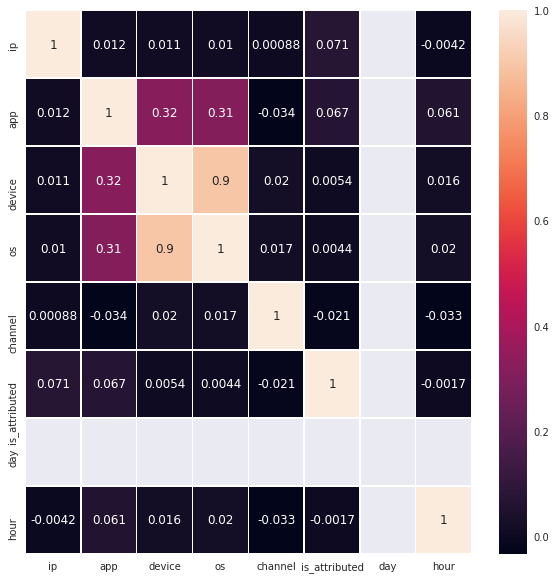

In [13]:
columns = list(day_9_data.columns)
plt.figure(figsize = (10, 10))
sns.heatmap(day_9_data[columns].corr(), annot = True, linewidth = 0.5)
plt.show()

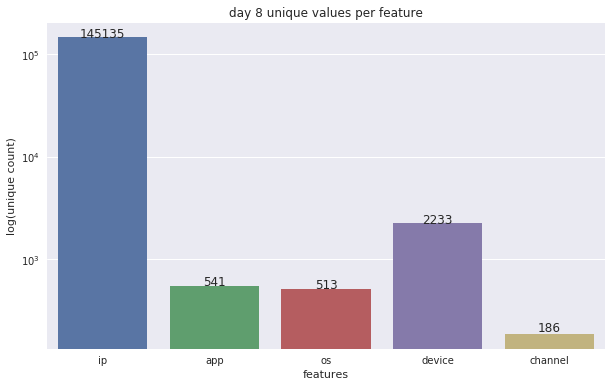

In [14]:
cols = ["ip", "app", "os", "device", "channel"]
uniques = [len(day_8_data[col].unique()) for col in cols]
plt.figure(figsize = (10, 6))
ax = sns.barplot(cols, uniques, log = True)
ax.set(xlabel= "features", ylabel = "log(unique count)", title = "day 8 unique values per feature")
for p, u in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2,
           height + 10,
           u, ha = "center")

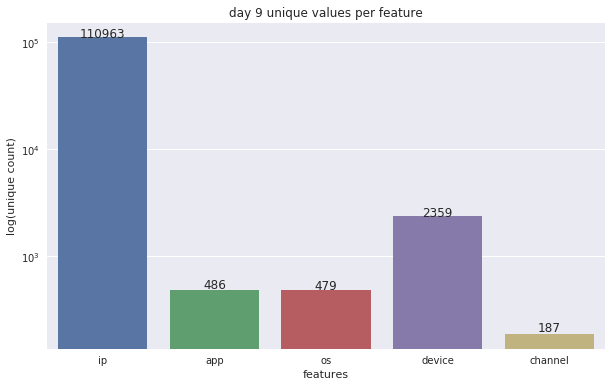

In [15]:
uniques = [len(day_9_data[col].unique()) for col in cols]
plt.figure(figsize = (10, 6))
ax = sns.barplot(cols, uniques, log = True)
ax.set(xlabel= "features", ylabel = "log(unique count)", title = "day 9 unique values per feature")
for p, u in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2,
           height + 10,
           u, ha = "center")

In [16]:
day_8_data["ip"].value_counts()[:10]

5348      366848
5314      363079
73516     279944
73487     278115
53454     179065
114276    150838
26995     132216
95766     128616
86767      97611
100275     96541
Name: ip, dtype: int64

In [17]:
day_9_data["ip"].value_counts()[:10]

5348      374392
5314      337427
73516     196307
73487     194498
53454     141914
17149     130043
26995     121791
114276    118756
112302    114715
95766     113979
Name: ip, dtype: int64

### Click hour in day 8

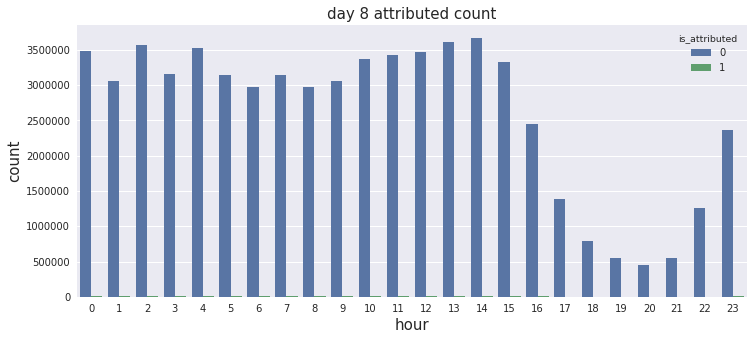

In [18]:
sns.countplot("hour", hue = "is_attributed", data = day_8_data)
plt.xlabel("hour", fontsize = 15)
plt.ylabel("count", fontsize = 15)
plt.title("day 8 attributed count", fontsize = 15)
plt.show()

In [19]:
day_8_attributed = day_8_data[day_8_data["is_attributed"] == 1]
print("number of attributed clicks in day 8 is {}".format(len(day_8_attributed)))

number of attributed clicks in day 8 is 153321


Text(0.5,1,'day 8 attributed hour count')

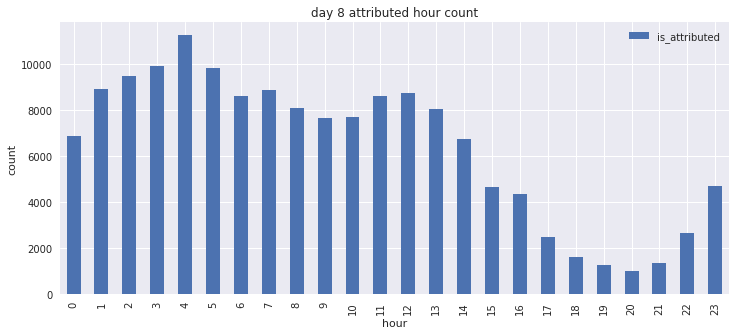

In [20]:
day_8_attributed[["hour", "is_attributed"]].groupby("hour", as_index = True).count().plot(kind = "bar")
plt.xlabel("hour")
plt.ylabel("count")
plt.title("day 8 attributed hour count")

### Click hour in day 9

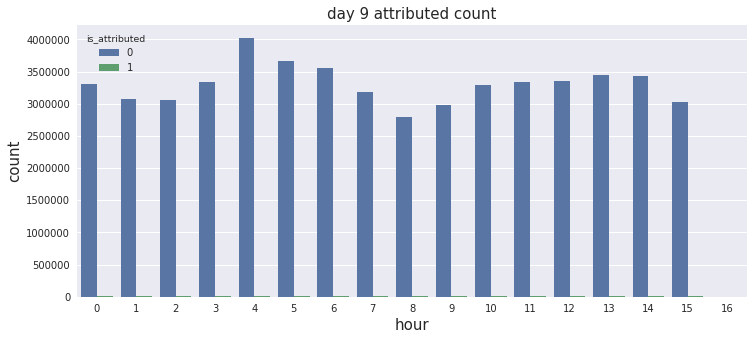

In [21]:
sns.countplot("hour", hue = "is_attributed", data = day_9_data)
plt.xlabel("hour", fontsize = 15)
plt.ylabel("count", fontsize = 15)
plt.title("day 9 attributed count", fontsize = 15)
plt.show()

In [22]:
day_9_attributed = day_9_data[day_9_data["is_attributed"] == 1]
print("number of attributed clicks in day 9 is {}".format(len(day_9_attributed)))

number of attributed clicks in day 9 is 133967


Text(0.5,1,'day 9 attributed hour count')

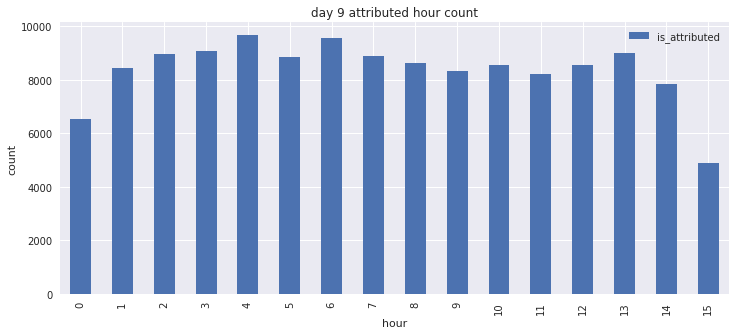

In [23]:
day_9_attributed[["hour", "is_attributed"]].groupby("hour", as_index = True).count().plot(kind = "bar")
plt.xlabel("hour")
plt.ylabel("count")
plt.title("day 9 attributed hour count")

### Device count in day 8 and day 9

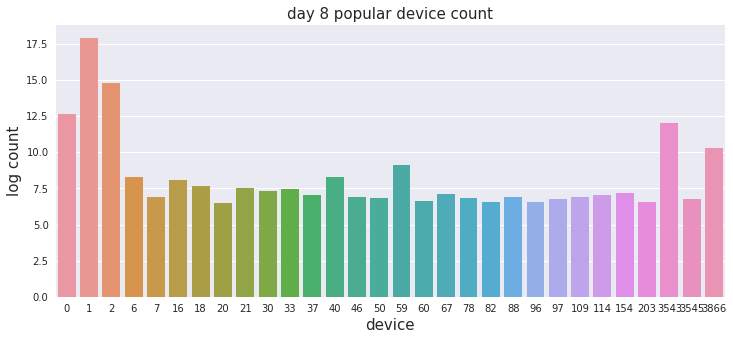

In [24]:
day_8_pop_device = day_8_data["device"].value_counts()[:30]
sns.barplot(day_8_pop_device.index, np.log(day_8_pop_device.values))
plt.xlabel("device", fontsize = 15)
plt.ylabel("log count", fontsize = 15)
plt.title("day 8 popular device count", fontsize = 15)
plt.show()

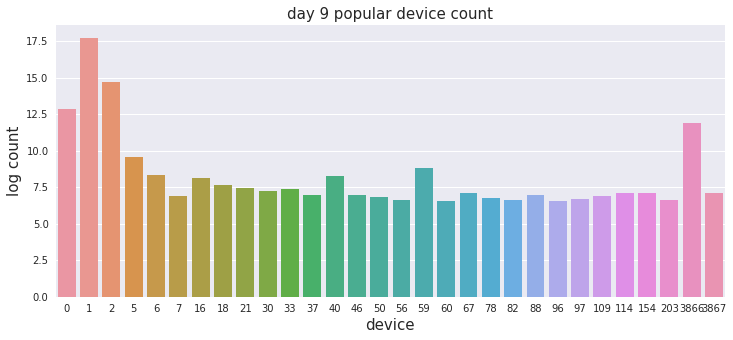

In [25]:
day_9_pop_device = day_9_data["device"].value_counts()[:30]
sns.barplot(day_9_pop_device.index, np.log(day_9_pop_device.values))
plt.xlabel("device", fontsize = 15)
plt.ylabel("log count", fontsize = 15)
plt.title("day 9 popular device count", fontsize = 15)
plt.show()

### Day 8 app

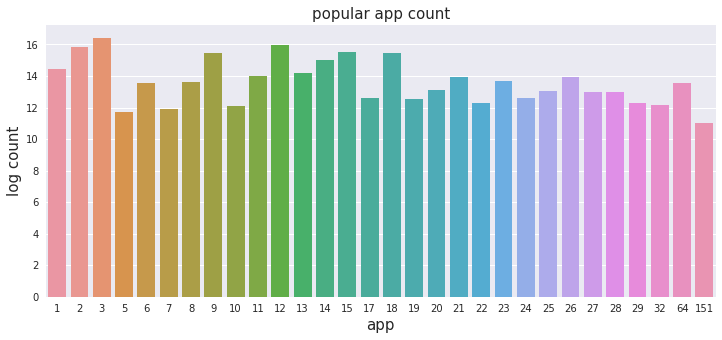

In [26]:
pop_app = day_8_data["app"].value_counts()[:30]
sns.barplot(pop_app.index, np.log(pop_app.values))
plt.xlabel("app", fontsize = 15)
plt.ylabel("log count", fontsize = 15)
plt.title("popular app count", fontsize = 15)
plt.show()

Text(0.5,1,'day 8 attributed app count')

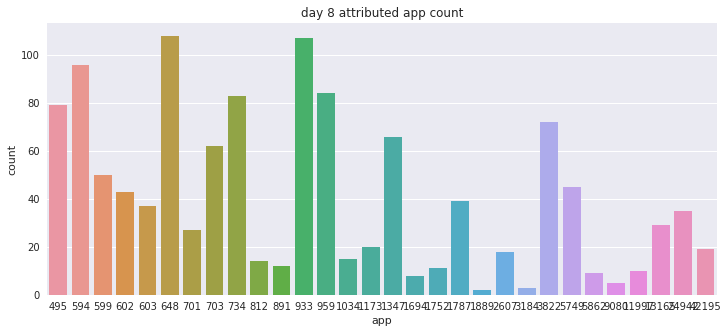

In [27]:
app_attributed = day_8_attributed["app"].value_counts()[:30]
sns.barplot(app_attributed.values, app_attributed.index)
plt.xlabel("app")
plt.ylabel("count")
plt.title("day 8 attributed app count")

App 640 attributed to more fraud clicks in day 8

Text(0.5,1,'number of apps obtain fraud per hour in day 8')

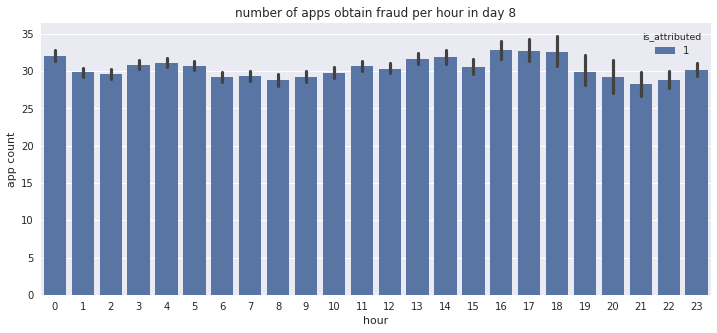

In [28]:
sns.barplot("hour", "app", hue = "is_attributed", data = day_8_attributed)
plt.xlabel("hour")
plt.ylabel("app count")
plt.title("number of apps obtain fraud per hour in day 8")

### Day 9 app

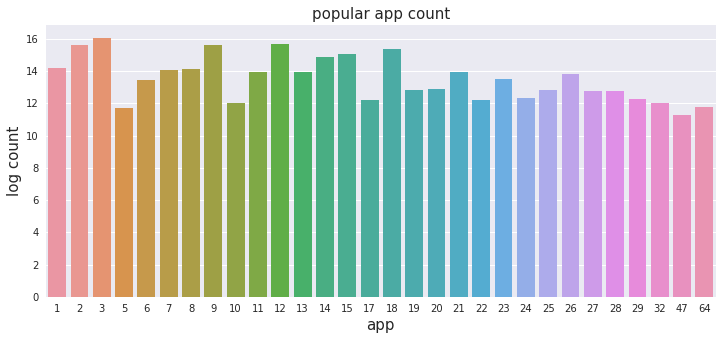

In [29]:
pop_app = day_9_data["app"].value_counts()[:30]
sns.barplot(pop_app.index, np.log(pop_app.values))
plt.xlabel("app", fontsize = 15)
plt.ylabel("log count", fontsize = 15)
plt.title("popular app count", fontsize = 15)
plt.show()

Text(0.5,1,'day 9 attributed app count')

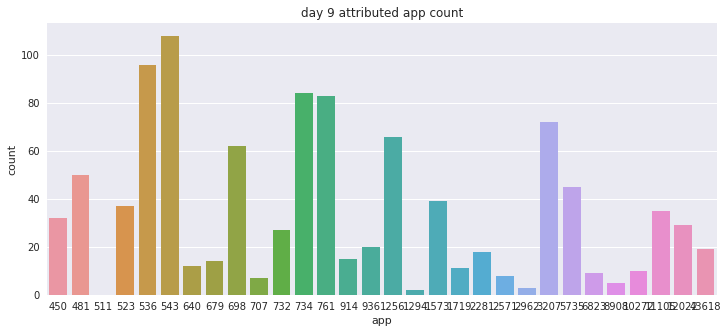

In [30]:
app_attributed = day_9_attributed["app"].value_counts()[:30]
sns.barplot(app_attributed.values, app_attributed.index)
plt.xlabel("app")
plt.ylabel("count")
plt.title("day 9 attributed app count")

App 543 attributed to more fraud clicks in day 9

Text(0.5,1,'number of apps obtain fraud per hour in day 9')

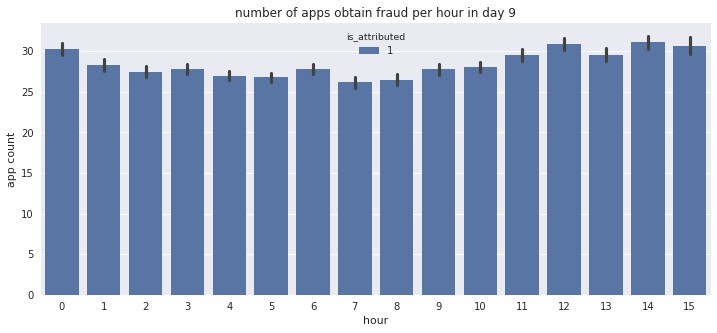

In [31]:
sns.barplot("hour", "app", hue = "is_attributed", data = day_9_attributed)
plt.xlabel("hour")
plt.ylabel("app count")
plt.title("number of apps obtain fraud per hour in day 9")

### Channel

Text(0.5,1,'day 8 channel count')

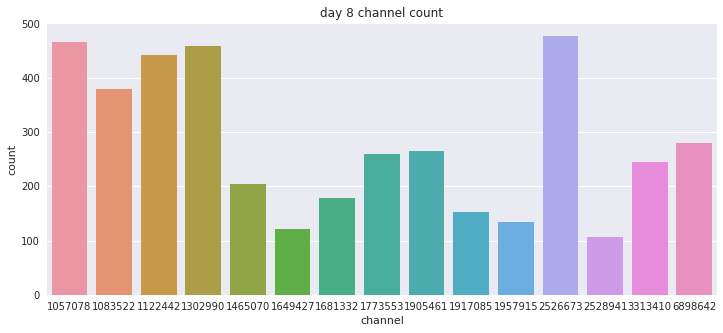

In [32]:
day_8_channel = day_8_data["channel"].value_counts()[:15]
sns.barplot(day_8_channel.values, day_8_channel.index)
plt.xlabel("channel")
plt.ylabel("count")
plt.title("day 8 channel count")

Text(0,0.5,'count')

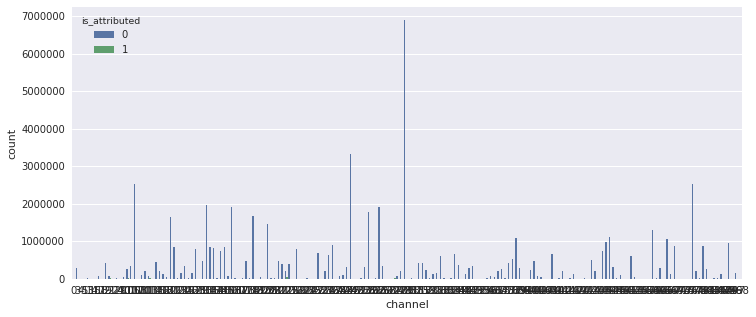

In [33]:
sns.countplot("channel", hue = "is_attributed", data = day_8_data)
plt.xlabel("channel")
plt.ylabel("count")

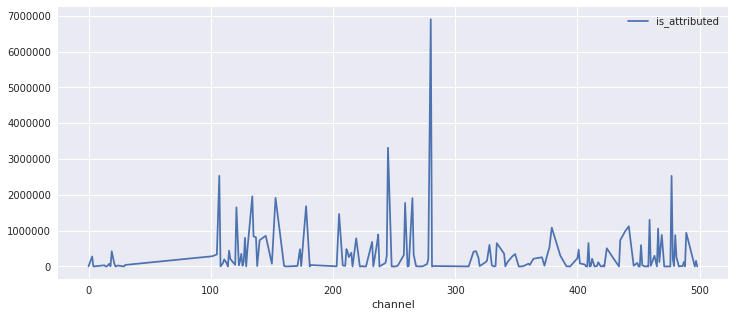

In [34]:
day_8_data[["channel", "is_attributed"]].groupby(["channel"], as_index = True).count().plot()

Text(0.5,1,'day 8 channel attributed to fraud')

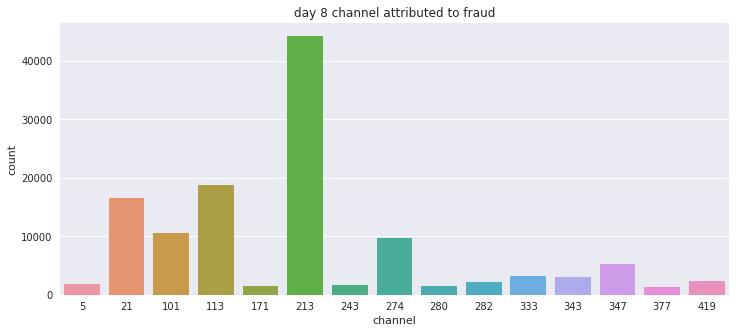

In [35]:
attributed_channel = day_8_attributed["channel"].value_counts()[:15]
sns.barplot(attributed_channel.index, attributed_channel.values)
plt.xlabel("channel")
plt.ylabel("count")
plt.title("day 8 channel attributed to fraud")

channel 213 attributed to more fraud click in day 8

Text(0.5,1,'day 9 channel count')

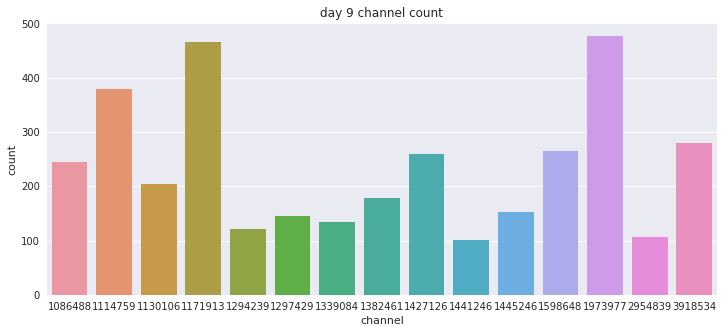

In [36]:
day_9_channel = day_9_data["channel"].value_counts()[:15]
sns.barplot(day_9_channel.values, day_9_channel.index)
plt.xlabel("channel")
plt.ylabel("count")
plt.title("day 9 channel count")

Text(0,0.5,'count')

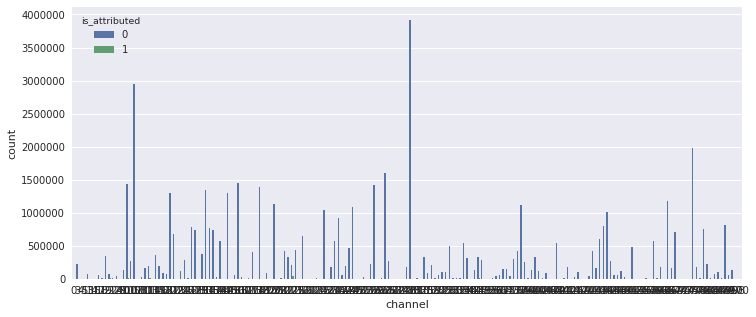

In [37]:
sns.countplot("channel", hue = "is_attributed", data = day_9_data)
plt.xlabel("channel")
plt.ylabel("count")

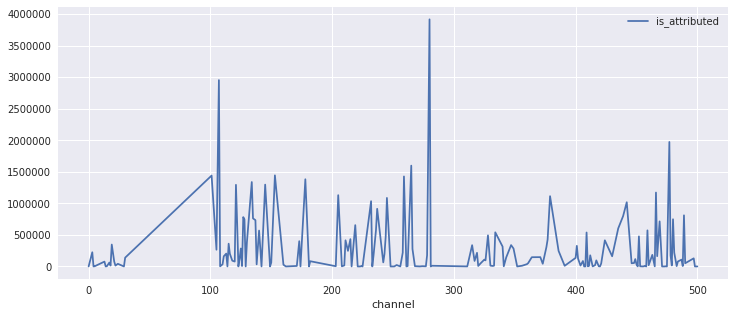

In [38]:
day_9_data[["channel", "is_attributed"]].groupby(["channel"], as_index = True).count().plot()

Text(0.5,1,'day 9 channel attributed to fraud')

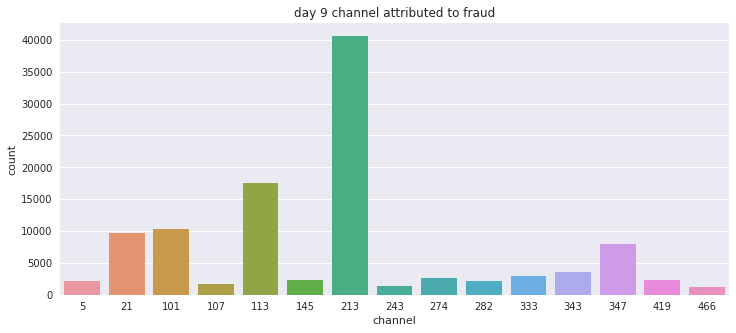

In [39]:
attributed_channel = day_9_attributed["channel"].value_counts()[:15]
sns.barplot(attributed_channel.index, attributed_channel.values)
plt.xlabel("channel")
plt.ylabel("count")
plt.title("day 9 channel attributed to fraud")

channel 213 attributed to more fraud click in day 9

In [40]:
def feature_eng(data):
    new_feat = data[["ip", "hour", "channel"]].groupby(by = ["ip", "hour"])[["channel"]].\
    count().reset_index().rename(index = str, columns={"channel": "ip_hour_count"})
    data = data.merge(new_feat, on = ["ip", "hour"], how = "left")
    del new_feat; gc.collect()

    new_feat = data[["ip", "app", "channel"]].groupby(by = ["ip", "app"])["channel"].count().\
    reset_index().rename(index = str, columns = {"channel": "ip_app_count"})
    data = data.merge(new_feat, on = ["ip", "app"], how = "left")
    del new_feat; gc.collect()

    new_feat = data[["ip", "device", "hour"]].groupby(by = ["ip", "device"])["hour"].count().\
    reset_index().rename(index = str, columns = {"hour": "ip_device_hour_count"})
    data = data.merge(new_feat, on = ["ip", "device"], how = "left")
    del new_feat; gc.collect() 
    
    new_feat = data[["device", "os", "app"]].groupby(by = ["device", "os"])["app"].count().\
    reset_index().rename(index = str, columns = {"app": "device_os_app_count"})
    data = data.merge(new_feat, on = ["device", "os"], how = "left")
    del new_feat; gc.collect() 
    
    new_feat = data[["ip", "app", "hour"]].groupby(by = ["ip", "app"])["hour"].count().\
    reset_index().rename(index = str, columns = {"hour": "ip_app_hour_count"})
    data = data.merge(new_feat, on = ["ip", "app"], how = "left")
    del new_feat; gc.collect() 
    
    new_feat = data[["device", "os", "app", "hour"]].groupby(by = ["device", "os", "app"])["hour"].\
    count().reset_index().rename(index = str, columns = {"hour": "device_os_app_hour_count"})
    data = data.merge(new_feat, on = ["device", "os", "app"], how = "left")
    del new_feat; gc.collect()
    
    new_feat = data[["device", "app", "hour"]].groupby(by = ["device", "app"])["hour"].\
    count().reset_index().rename(index = str, columns = {"hour": "device_app_hour_count"})
    data = data.merge(new_feat, on = ["device", "app"], how = "left")
    del new_feat; gc.collect()
    
    new_feat = data[["ip", "device", "os", "app", "hour", "channel"]].\
    groupby(by = ["ip", "device", "os", "app", "hour"])["channel"].count().\
    reset_index().rename(index = str, columns = {"channel": "ip_device_os_app_hour_count"})
    data = data.merge(new_feat, on = ["ip", "device", "os", "app", "hour"], how = "left")
    del new_feat; gc.collect() 

    new_feat = data[["device", "os", "channel"]].groupby(by = ["device", "os"])["channel"].\
    count().reset_index().rename(index = str, columns = {"channel": "device_os_count"})
    data = data.merge(new_feat, on = ["device", "os"], how = "left")
    del new_feat; gc.collect()
    
    new_feat = data[["app", "hour"]].groupby(by = ["app"])["hour"].count().reset_index().\
    rename(index = str, columns = {"hour": "app_hour_count"})
    data = data.merge(new_feat, on = ["app"], how = "left")
    del new_feat; gc.collect()
    
    new_feat = data[["ip","app", "device", "hour"]].groupby(by = ["ip","app", "device"])["hour"].\
    count().reset_index().rename(index = str, columns = {"hour": "ip_app_device_hour_count"})
    data = data.merge(new_feat, on = ["ip","app", "device"], how = "left")
    del new_feat; gc.collect()
    return data

day_9_data = feature_eng(day_9_data[:10000])

In [41]:
def base_feature_freq(data):
    columns = ["app", "device", "os", "channel"]
    for c in columns:
        data[c + "_freq"] = data.groupby(by = [c])[c].transform("count")
    return data

day_9_data = base_feature_freq(day_9_data)

In [42]:
# Calculate information value
# https://www.kaggle.com/puremath86/iv-woe-starter-for-python/notebook
def calc_iv(df, feature, target, pr=False):
    """
    Set pr=True to enable printing of output.
    
    Output: 
      * iv: float,
      * data: pandas.DataFrame
    """

    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())


    iv = data['IV'].sum()
    # print(iv)

    return iv, data

In [43]:
columns = day_9_data.columns[9:]
for c in columns:
    print("{} iv is {}".format(c, calc_iv(day_9_data, c, "is_attributed", pr=False)[0]))

ip_hour_count iv is 0.44548776648665955
ip_app_count iv is 0.019501906007931852
ip_device_hour_count iv is 0.6100736545716487
device_os_app_count iv is 2.4206827484795754
ip_app_hour_count iv is 0.019501906007931852
device_os_app_hour_count iv is 1.520959707729029
device_app_hour_count iv is 2.6560531485004355
ip_device_os_app_hour_count iv is 0.0010142418988393573
device_os_count iv is 2.4206827484795754
app_hour_count iv is 3.0598360097932598
ip_app_device_hour_count iv is 0.017187050975661575
app_freq iv is 3.0598360097932598
device_freq iv is 2.094866903772816
os_freq iv is 2.3733233184202036
channel_freq iv is 2.497518006309086


In [44]:
day_9_data.head()

,ip,app,device,os,channel,click_time,is_attributed,day,hour,ip_hour_count,...,device_os_app_hour_count,device_app_hour_count,ip_device_os_app_hour_count,device_os_count,app_hour_count,ip_app_device_hour_count,app_freq,device_freq,os_freq,channel_freq
0,201143,11,1,13,487,2017-11-09 00:00:00,0,9,0,5,...,54,216,1,2142,221,1,221,9526,2237,25
1,34684,2,1,13,469,2017-11-09 00:00:00,0,9,0,4,...,170,819,1,2142,850,1,850,9526,2237,130
2,207368,26,1,19,477,2017-11-09 00:00:00,0,9,0,3,...,57,246,1,2496,246,1,246,9526,2544,316
3,110176,18,1,8,121,2017-11-09 00:00:00,0,9,0,2,...,37,762,1,326,770,1,770,9526,339,269
4,109644,12,1,19,265,2017-11-09 00:00:00,0,9,0,3,...,352,1391,1,2496,1459,1,1459,9526,2544,290


In [45]:
D= 2**26
day_9_data['category'] = (day_9_data['ip'].astype(str) + "_" + day_9_data['app'].astype(str) 
                          + "_" + day_9_data['device'].astype(str) 
                          + "_" + day_9_data['os'].astype(str)).apply(hash) % D
click_buffer= np.full(D, 3000000000, dtype=np.uint32)
day_9_data['click_time'] = pd.to_datetime(day_9_data['click_time'])
day_9_data['epochtime']= day_9_data['click_time'].astype(np.int64) // 10 ** 9
next_clicks= []
for category, time in zip(reversed(day_9_data['category'].values), reversed(day_9_data['epochtime'].values)):
    next_clicks.append(click_buffer[category]-time)
    click_buffer[category]= time
day_9_data['next_click']= list(reversed(next_clicks))

In [46]:
day_9_data.head()

,ip,app,device,os,channel,click_time,is_attributed,day,hour,ip_hour_count,...,device_os_count,app_hour_count,ip_app_device_hour_count,app_freq,device_freq,os_freq,channel_freq,category,epochtime,next_click
0,201143,11,1,13,487,2017-11-09,0,9,0,5,...,2142,221,1,221,9526,2237,25,57646776,1510185600,1489814400
1,34684,2,1,13,469,2017-11-09,0,9,0,4,...,2142,850,1,850,9526,2237,130,51396652,1510185600,1489814400
2,207368,26,1,19,477,2017-11-09,0,9,0,3,...,2496,246,1,246,9526,2544,316,31259370,1510185600,1489814400
3,110176,18,1,8,121,2017-11-09,0,9,0,2,...,326,770,1,770,9526,339,269,44053997,1510185600,1489814400
4,109644,12,1,19,265,2017-11-09,0,9,0,3,...,2496,1459,1,1459,9526,2544,290,28525874,1510185600,1489814400


In [47]:
day_9_data.tail()

,ip,app,device,os,channel,click_time,is_attributed,day,hour,ip_hour_count,...,device_os_count,app_hour_count,ip_app_device_hour_count,app_freq,device_freq,os_freq,channel_freq,category,epochtime,next_click
9995,235471,18,1,12,107,2017-11-09 00:00:11,0,9,0,1,...,121,770,1,770,9526,125,400,58215207,1510185611,1489814389
9996,72346,12,1,19,328,2017-11-09 00:00:11,0,9,0,1,...,2496,1459,1,1459,9526,2544,85,49753459,1510185611,1489814389
9997,78957,18,1,13,107,2017-11-09 00:00:11,0,9,0,1,...,2142,770,1,770,9526,2237,400,28542660,1510185611,1489814389
9998,289383,64,1,8,459,2017-11-09 00:00:11,0,9,0,1,...,326,125,1,125,9526,339,198,64013946,1510185611,1489814389
9999,9602,2,1,25,435,2017-11-09 00:00:11,0,9,0,4,...,177,850,1,850,9526,184,133,36921407,1510185611,1489814389
